# Бронирование отелей. Исследование алгоритмов классификации
Источник: https://www.kaggle.com/datasets/iremnurtokuroglu/credit-score-classification-cleaned-dataset/data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv(r'raw/hotel_reservations.csv')
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [3]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [5]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [6]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [7]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

#### Присвоим числовые значения к категориальным признакам
- `type_of_meal_plan`: 'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3
- `booking_status`: 'Canceled': 0, 'Not_Canceled': 1
- `room_type_reserved`: 'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5,
'Room_Type 6': 6, 'Room_Type 7': 7
- `market_segment_type`: 'Online': 0, 'Offline': 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4

In [8]:
df.drop('Booking_ID', axis=1, inplace=True)

maps = {
    'type_of_meal_plan': {'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3},
    'booking_status': {'Canceled': 0, 'Not_Canceled': 1},
    'room_type_reserved': {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5,
                           'Room_Type 6': 6, 'Room_Type 7': 7},
    'market_segment_type': {'Online': 0, 'Offline': 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4}
}

for col, mapping in maps.items():
    df[col] = df[col].map(mapping)

df.sample(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
23674,1,0,0,1,1,0,1,19,2018,8,31,0,0,0,0,99.2,0,0
35792,1,0,1,0,1,0,1,4,2018,1,25,2,0,0,0,59.0,0,1
35421,2,0,1,2,1,0,1,0,2017,8,21,0,0,0,0,90.0,0,0
1102,1,0,0,1,1,0,1,5,2018,2,3,2,1,0,4,66.0,0,1
1680,2,0,0,2,1,0,1,42,2018,11,4,1,0,0,0,72.0,0,1


#### Выбор метки
Выберем `booking_status` как метку для классификации

booking_status
1    24390
0    11885
Name: count, dtype: int64


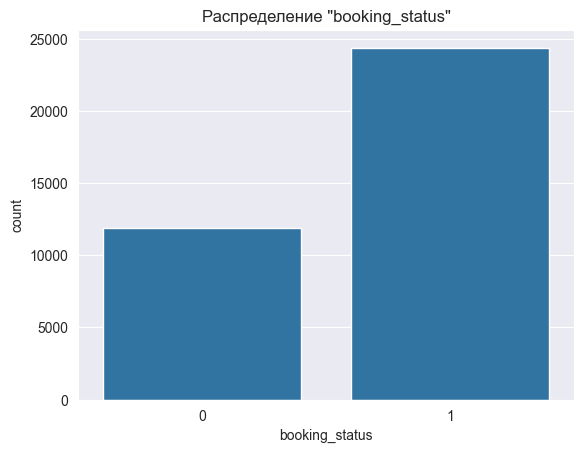

In [9]:
ax = sns.countplot(data=df, x='booking_status').set_title('Распределение "booking_status"')
print(df['booking_status'].value_counts())

#### Балансировка с помощью over-sampling
Видно, что количество отмен бронирования в два раза меньше, чем неотмененных. Применим балансировку over-sampling. Увеличим количество отмен бронирований в чуть более чем два раза.


In [10]:
# Over sampling.
smote = SMOTE(random_state=0)
x = df.drop('booking_status', axis=1)
y = df['booking_status']
x_smote, y_smote = smote.fit_resample(x, y)
df_over_sampled = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote, columns=['booking_status'])], axis=1)

In [11]:
print(df_over_sampled['booking_status'].value_counts())

booking_status
1    24390
0    24390
Name: count, dtype: int64


#### K Nearest Neighbors (Метод ближайших соседей)

In [12]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score, roc_auc_score,
    precision_score, recall_score, f1_score
)


def show_metrics(y_test, knn_pred):
    sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = round(accuracy_score(y_test, knn_pred), 3)
    precision = round(precision_score(y_test, knn_pred), 3)
    recall = round(recall_score(y_test, knn_pred), 3)
    f1 = round(f1_score(y_test, knn_pred), 3)
    roc = round(roc_auc_score(y_test, knn_pred), 3)
    m_df = pd.DataFrame({
        'Metric': ['accuracy', 'precision', 'recall', 'f1', 'roc'],
        'Score': [accuracy, precision, recall, f1, roc]
    })
    print(m_df.to_string(index=False))

In [13]:
def best_k(x_train, x_test, y_train, y_test, max_k):
    scores = []
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        knn_pred = knn.predict(x_test)
        scores.append(accuracy_score(y_test, knn_pred))
    result_k = scores.index(max(scores)) + 1
    return result_k


def get_knn(x_train, x_test, y_train, y_test, max_k):
    k = best_k(x_train, x_test, y_train, y_test, max_k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)

    print(f'kNN with k={k}')
    show_metrics(y_test, knn_pred)

    return knn


def res_knn(dataframe: pd.DataFrame, target_name: str, max_k: int):
    x_train, x_test, y_train, y_test = train_test_split(
        dataframe.drop(target_name, axis=1),
        dataframe[target_name],
        test_size=0.2,
        random_state=0
    )
    get_knn(x_train, x_test, y_train, y_test, max_k)

Также возьмем не сбалансированный датафрейм, для того, чтобы можно было увидеть наглядно улучшение результата классификации.

KNN for not balanced DataFrame (shape: (36275, 18))
kNN with k=11


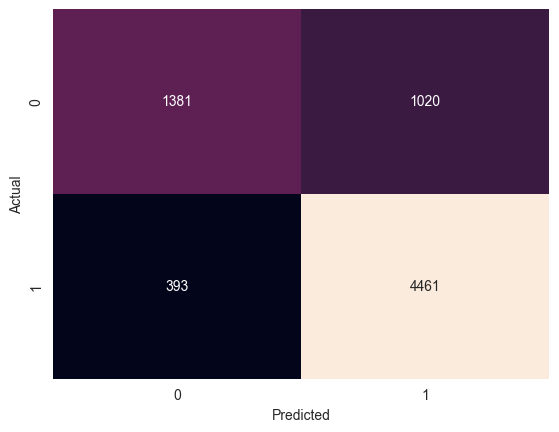

   Metric  Score
 accuracy  0.805
precision  0.814
   recall  0.919
       f1  0.863
      roc  0.747


KNN for over-sampled DF (shape: (48780, 18))
kNN with k=1


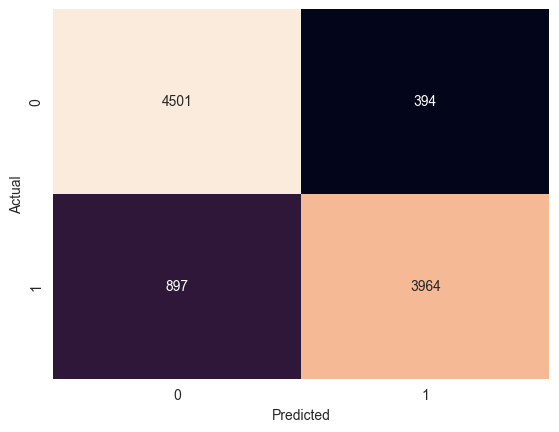

   Metric  Score
 accuracy  0.868
precision  0.910
   recall  0.815
       f1  0.860
      roc  0.867


In [17]:
print(f'KNN for not balanced DataFrame (shape: {df.shape})')
res_knn(df, 'booking_status', 20)

print(f'\n\nKNN for over-sampled DF (shape: {df_over_sampled.shape})')
res_knn(df_over_sampled, 'booking_status', 10)

#### Decision Tree (Дерево решений)

In [15]:
def get_dt(x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    dt_pred = dt.predict(x_test)
    
    print(f'Decision Tree results:')
    show_metrics(y_test, dt_pred)
    
    return dt

def res_dt(dataframe: pd.DataFrame, target_name: str):
    x_train, x_test, y_train, y_test = train_test_split(
        dataframe.drop(target_name, axis=1),
        dataframe[target_name],
        test_size=0.2,
        random_state=0
    )
    get_dt(x_train, x_test, y_train, y_test)

DT for not balanced DF (shape: (36275, 18))
Decision Tree results:


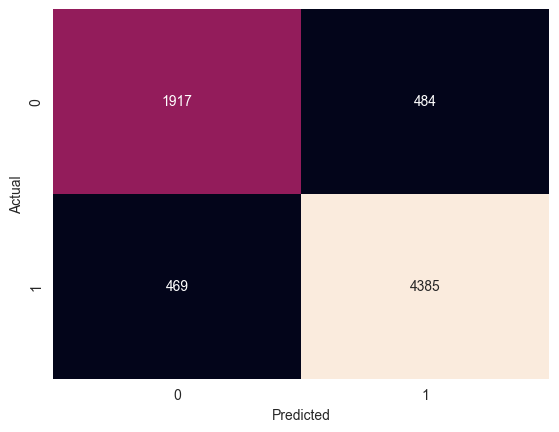

   Metric  Score
 accuracy  0.869
precision  0.901
   recall  0.903
       f1  0.902
      roc  0.851


DT for over-sampled DF (shape: (48780, 18))
Decision Tree results:


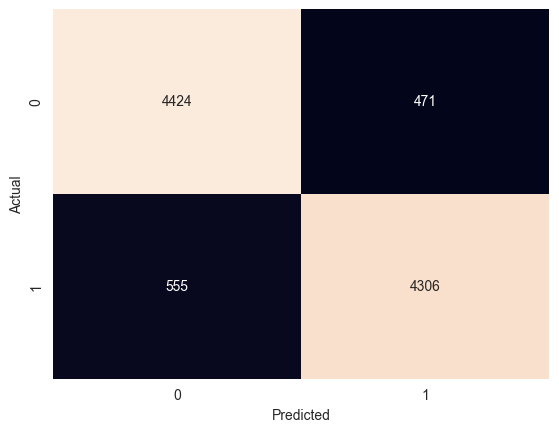

   Metric  Score
 accuracy  0.895
precision  0.901
   recall  0.886
       f1  0.894
      roc  0.895


In [18]:
print(f'DT for not balanced DF (shape: {df.shape})')
res_dt(df, 'booking_status')

print(f'\n\nDT for over-sampled DF (shape: {df_over_sampled.shape})')
res_dt(df_over_sampled, 'booking_status')



| Метрика   | Not Balanced KNN | Over-Samlped KNN | Not Balanced DT | Over-Samlped DT |
|-----------|------------------|------------------|-----------------|-----------------|
| Accuracy  | 0.805            | 0.868            | 0.869           | 0.895           |
| Precision | 0.814            | 0.910            | 0.901           | 0.901           |
| Recall    | 0.919            | 0.815            | 0.903           | 0.886           |
| F1        | 0.863            | 0.860            | 0.902           | 0.894           |
| ROC       | 0.747            | 0.867            | 0.851           | 0.895           |

#### Вывод
- Модели на основе DT показывают более высокие результаты, чем KNN, как при использовании оригинальных данных, так и с применением метода over-sampling. Особенно это заметно по метрике accuracy, где DT достигает 0.895 против 0.868 у KNN. Это также подтверждается улучшенными значениями по меткам Precision, Recall и ROC, что делает деревья решений более подходящими для данной задачи.

- Использование метода балансировки over-sampling значимо улучшает результаты для обеих моделей. Особенно это видно по Accuracy и F1. Модели, обученные на сбалансированных данных, показали наилучшие результаты, подтверждая, что переподборка классов помогает справиться с дисбалансом данных, улучшая общую производительность.

- Несмотря на высокие показатели Recall у KNN без балансировки (0.919), модель имеет наименьшую Accuracy (0.805) и ROC (0.747). Это указывает на проблему переобучения или переоценки одних классов в ущерб другим. В то время как KNN в целом может показывать высокую полноту, точность модели страдает, и она недостаточно хорошо разделяет классы.

- Модели на основе DT, особенно с применением переподборки классов, показывают лучший баланс между Precision, Recall, и F1. Это делает их более универсальными для различных типов задач, где важны не только точность, но и полнота классификации.